In [ ]:
######################################################################################
#Instructions for Module 3 Lab — Individual Lab #1

#In this lab you will demonstrate your practical big data skills that you have learned in three classes. 
#You need perform various exploratory data analyses of Boston Housing Download Boston Housingdataset 
#Download the Boston Housing datasetusing PySpark. You are open to perform various exploratory data analyses. 
#However, you need to perform at least the following operations:

#1. Read the given CSV file
#2. Show the first 5 elements of your dataset
#3. Count the number of observations in the given dataset
#4. Show the Schema of your dataset
#5. Drop the column "b" from your dataset
#6. Round all of the numerical columns into two decimal places
#7. Create a new column (Age10)  with a 10% increase of 'age' column
#8. Plot Age10 column on a 2D Plot
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
#10. Convert  Spark Dataframe to Pandas Dataframe
#11. Show the last 5 rows of Pandas DataFrame
######################################################################################

In [ ]:
#Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [ ]:
# set your spark folder to your system path environment.
import os

In [ ]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

In [ ]:
# Install library for finding Spark
!pip install -q findspark

In [ ]:
# Import the libary
import findspark

In [ ]:
# Initiate findspark
findspark.init()

In [ ]:
# Check the location for Spark
findspark.find()

'/content/spark-3.0.0-bin-hadoop3.2'

In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

In [ ]:
#Create a Spark Session
spark = SparkSession.builder.master("local[*]").getOrCreate()
sparkhive = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


In [ ]:
sparkhive.sql("CREATE DATABASE BostonH")

DataFrame[]

In [53]:
spark

In [ ]:
df_db = spark.sql("show databases")

In [ ]:
df_db.show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



In [ ]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing.csv


{'BostonHousing.csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.09378,12

In [58]:
#1. Read the given CSV file
df1 = spark.read.csv('BostonHousing.csv', inferSchema = True, header = True)

In [59]:
df1.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [ ]:
df1.write.mode("overwrite").saveAsTable("bostonh.bos_housing")

In [ ]:
df1.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [ ]:
spark.sql("select * from bostonh.bos_housing").show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

In [60]:
#2. Show the first 5 elements of your dataset
df1.head(5)

[Row(crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, b=396.9, lstat=4.98, medv=24.0),
 Row(crim=0.02731, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=6.421, age=78.9, dis=4.9671, rad=2, tax=242, ptratio=17.8, b=396.9, lstat=9.14, medv=21.6),
 Row(crim=0.02729, zn=0.0, indus=7.07, chas=0, nox=0.469, rm=7.185, age=61.1, dis=4.9671, rad=2, tax=242, ptratio=17.8, b=392.83, lstat=4.03, medv=34.7),
 Row(crim=0.03237, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=6.998, age=45.8, dis=6.0622, rad=3, tax=222, ptratio=18.7, b=394.63, lstat=2.94, medv=33.4),
 Row(crim=0.06905, zn=0.0, indus=2.18, chas=0, nox=0.458, rm=7.147, age=54.2, dis=6.0622, rad=3, tax=222, ptratio=18.7, b=396.9, lstat=5.33, medv=36.2)]

In [ ]:
#3. Count the number of observations in the given dataset
df1.count()

506

In [ ]:
#4. Show the Schema of your dataset
df1.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [61]:
#5. Drop the column "b" from your dataset
df1 = df1.drop(df1.b)

In [62]:
df1.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [63]:
df1.show()


+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2|29.93|16.5|
|0.17004|12.5| 7.87|   0|0.524|6.004| 85.9|6.5921|  5|311|   15.

In [69]:
#6. Round all of the numerical columns into two decimal places
from pyspark.sql.functions import round, col
for c in df1.columns:
    df1 = df1.withColumn(c, round(c, 2))

In [71]:
#7. Create a new column (Age10)  with a 10% increase of 'age' column
df1 = df1.withColumn("Age10",col("age")+ (col("age")*0.10))

In [72]:
df1.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0|             71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4|50.379999999999995|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7| 64.57000000000001|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9| 73.25999999999999|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|            105.71|
|0.21|12.5

In [ ]:
df1.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv|             Age10|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------------------+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0|             71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6|             86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21000000000001|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4|50.379999999999995|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2|59.620000000000005|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7| 64.57000000000001|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9| 73.25999999999999|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|            105.71|
|0.21|12.5

In [ ]:
 df1 = df1.withColumn("Age10", round("Age10", 2))

In [ ]:
df1.show()

+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------+
|crim|  zn|indus|chas| nox|  rm|  age| dis|rad|tax|ptratio|lstat|medv| Age10|
+----+----+-----+----+----+----+-----+----+---+---+-------+-----+----+------+
|0.01|18.0| 2.31|   0|0.54|6.58| 65.2|4.09|  1|296|   15.3| 4.98|24.0| 71.72|
|0.03| 0.0| 7.07|   0|0.47|6.42| 78.9|4.97|  2|242|   17.8| 9.14|21.6| 86.79|
|0.03| 0.0| 7.07|   0|0.47|7.19| 61.1|4.97|  2|242|   17.8| 4.03|34.7| 67.21|
|0.03| 0.0| 2.18|   0|0.46| 7.0| 45.8|6.06|  3|222|   18.7| 2.94|33.4| 50.38|
|0.07| 0.0| 2.18|   0|0.46|7.15| 54.2|6.06|  3|222|   18.7| 5.33|36.2| 59.62|
|0.03| 0.0| 2.18|   0|0.46|6.43| 58.7|6.06|  3|222|   18.7| 5.21|28.7| 64.57|
|0.09|12.5| 7.87|   0|0.52|6.01| 66.6|5.56|  5|311|   15.2|12.43|22.9| 73.26|
|0.14|12.5| 7.87|   0|0.52|6.17| 96.1|5.95|  5|311|   15.2|19.15|27.1|105.71|
|0.21|12.5| 7.87|   0|0.52|5.63|100.0|6.08|  5|311|   15.2|29.93|16.5| 110.0|
|0.17|12.5| 7.87|   0|0.52| 6.0| 85.9|6.59|  5|311|   15.2| 17.1

In [ ]:
import pandas as pd

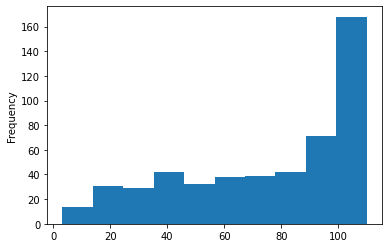

In [74]:
#8. Plot Age10 column on a 2D Plot
# Convert to Pandas DataFrame  
df_pandas = df1.toPandas()
df_pandas['Age10'].plot(kind="hist")

In [ ]:
#9. Provide Summary Statistics of all columns (count, mean, stddev,min, max)
df1.describe().show()


+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|summary|              crim|                zn|             indus|              chas|               nox|                rm|               age|               dis|              rad|               tax|           ptratio|             lstat|              medv|             Age10|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+
|  count|               506|               506|               506|               506|               506|               506|               506|               506|              

In [ ]:
#10. Convert  Spark Dataframe to Pandas Dataframe
df_pandas = df1.toPandas()

In [ ]:
#11. Show the last 5 rows of Pandas DataFrame
df_pandas.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,Age10
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296,15.3,4.98,24.0,71.72
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242,17.8,9.14,21.6,86.79
2,0.03,0.0,7.07,0,0.47,7.19,61.1,4.97,2,242,17.8,4.03,34.7,67.21
3,0.03,0.0,2.18,0,0.46,7.00,45.8,6.06,3,222,18.7,2.94,33.4,50.38
4,0.07,0.0,2.18,0,0.46,7.15,54.2,6.06,3,222,18.7,5.33,36.2,59.62


In [50]:
df_pandas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613419,8.601602,0.01,0.0800,0.255,3.6775,88.98
zn,506.0,11.363636,23.322453,0.00,0.0000,0.000,12.5000,100.00
indus,506.0,11.136779,6.860353,0.46,5.1900,9.690,18.1000,27.74
chas,506.0,0.069170,0.253994,0.00,0.0000,0.000,0.0000,1.00
nox,506.0,0.554763,0.115507,0.39,0.4500,0.540,0.6200,0.87
rm,506.0,6.285217,0.702853,3.56,5.8900,6.210,6.6275,8.78
age,506.0,68.574901,28.148861,2.90,45.0250,77.500,94.0750,100.00
dis,506.0,3.795435,2.105776,1.13,2.1000,3.210,5.1875,12.13
rad,506.0,9.549407,8.707259,1.00,4.0000,5.000,24.0000,24.00
tax,506.0,408.237154,168.537116,187.00,279.0000,330.000,666.0000,711.00


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

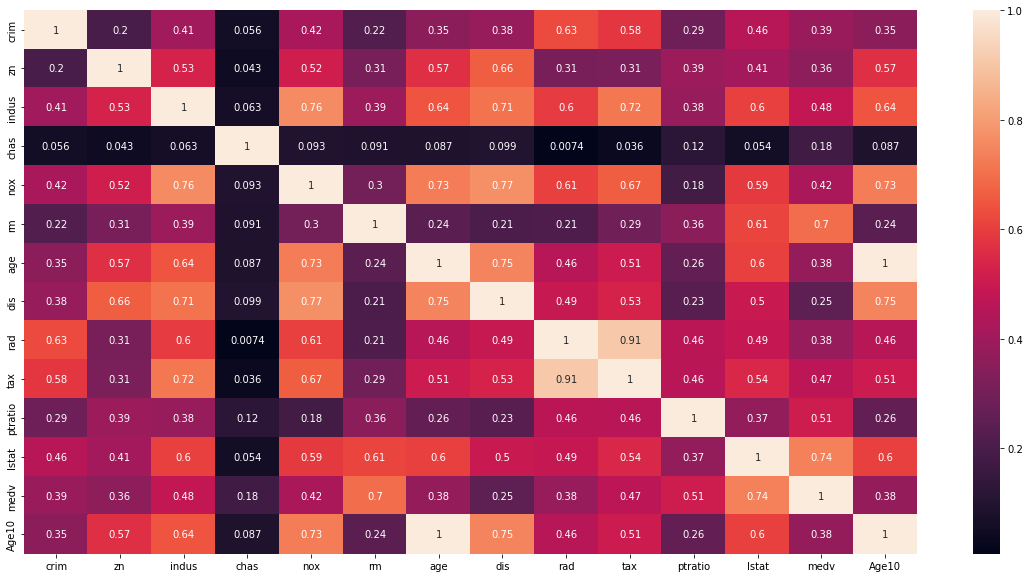

In [52]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_pandas.corr().abs(),  annot=True)